# Explore here

In [1]:
# import sys
# !{sys.executable} -m pip install scikit-learn

In [2]:
# Your code here
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data_uni = data.drop_duplicates()
data_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data.to_csv("../data/raw/data.csv", index=False)

In [4]:
data_uni.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='DiabetesPedigreeFunction'>

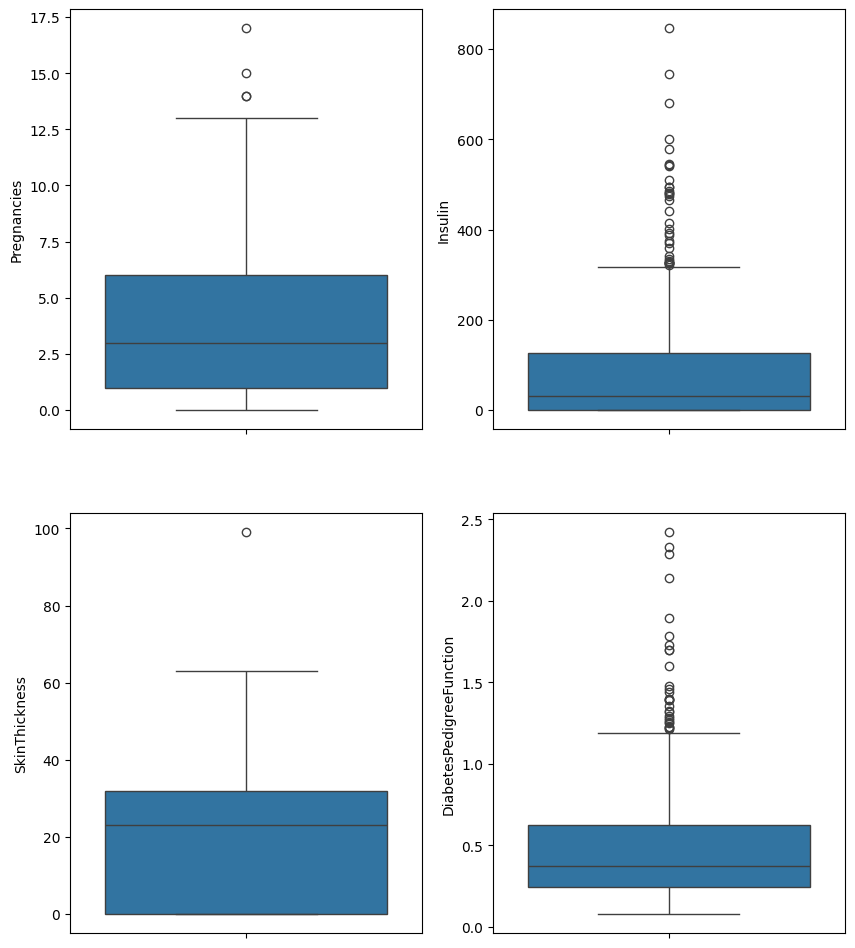

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fis, axis = plt.subplots(2,2,figsize=(10,12))
sns.boxplot(ax=axis[0,0],data=data_uni["Pregnancies"])
sns.boxplot(ax=axis[1,0],data=data_uni["SkinThickness"])
sns.boxplot(ax=axis[0,1],data=data_uni["Insulin"])
sns.boxplot(ax=axis[1,1],data=data_uni["DiabetesPedigreeFunction"])

In [6]:
# Eliminar valores atipicos
import numpy as np
col = ["Pregnancies", "SkinThickness", "Insulin", "DiabetesPedigreeFunction"]
# pregnacies
data_uni.loc[data_uni["Pregnancies"] > 12,"Pregnancies"] = np.nan
mediana_preg = data_uni["Pregnancies"].median()
data_uni.fillna({"Pregnancies":mediana_preg},inplace=True)

# Insulin
data_uni.loc[data_uni["Insulin"] > 350,"Insulin"] = np.nan
mediana_in = data_uni["Insulin"].median()
data_uni.fillna({"Insulin":mediana_in},inplace=True)

# SkinThickness
data_uni.loc[data_uni["SkinThickness"] > 70,"SkinThickness"] = np.nan
mediana_skin = data_uni["SkinThickness"].median()
data_uni.fillna({"SkinThickness":mediana_skin},inplace=True)

# DiabetesPedigreeFunction
data_uni.loc[data_uni["DiabetesPedigreeFunction"] > 1.3,"DiabetesPedigreeFunction"] = np.nan
mediana_diab = data_uni["DiabetesPedigreeFunction"].median()
data_uni.fillna({"DiabetesPedigreeFunction":mediana_diab},inplace=True)


In [7]:
from sklearn.preprocessing import StandardScaler
new_data=data_uni.drop(columns=["Outcome"])
scaler = StandardScaler()
norm_features = scaler.fit_transform(new_data)
data_scal = pd.DataFrame(norm_features, index = new_data.index,columns=new_data.columns)
data_scal["Outcome"] = data_uni["Outcome"]

<Axes: >

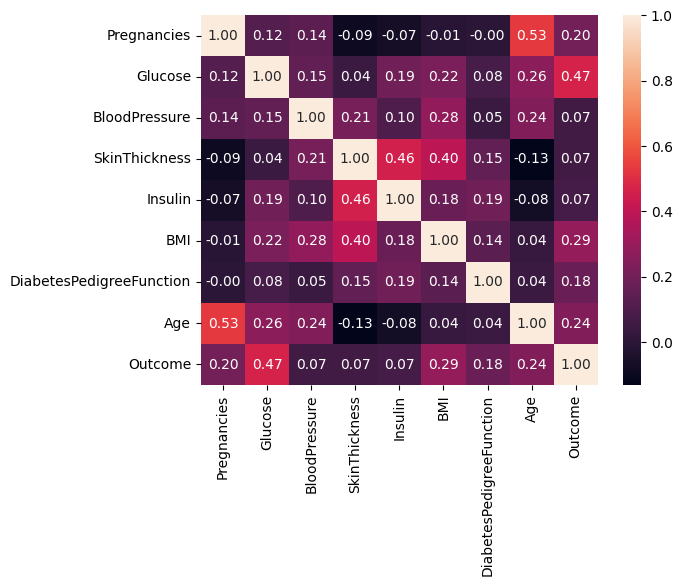

In [8]:
import seaborn as sns
sns.heatmap(data_scal.corr(), annot = True, fmt = ".2f")

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

col = ["Pregnancies", "Glucose", "BMI", "Age"]
X = data_scal[col]
Y = data_scal["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)
model = RandomForestClassifier(random_state=8)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

score = accuracy_score(y_test,y_pred)
print(f"score: {score}")

score: 0.7337662337662337


In [10]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "n_estimators":[5,8,10,15,20,25],
    "max_depth": [4,6,8],
    "min_samples_split": [5,8,10,15],
    "min_samples_leaf": [5,8,10,15]
}
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)

grid.fit(x_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 5}


In [17]:
model_opt = RandomForestClassifier(max_depth=6,n_estimators=5,min_samples_leaf=5,min_samples_split=5,random_state=8)
model_opt.fit(x_train,y_train)
y_pred_opt = model_opt.predict(x_test)
score_opt = accuracy_score(y_test,y_pred_opt)
print(f"score optimized: {score_opt}")

score optimized: 0.7467532467532467


In [12]:
x_train.to_csv("../data/processed/x_train.csv", index=False)
x_test.to_csv("../data/processed/x_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

In [13]:
from pickle import dump

dump(model_opt, open("../models/random_forest_classifier.sav", "wb"))

In [14]:
y_pred_tr_2 = model_opt.predict(x_train)
score_tr = accuracy_score(y_train,y_pred_tr_2)
print(f"Score modelo 2 train: {score_tr}")

Score modelo 2 train: 0.8224755700325733
